 # 練習問題:金融機関のキャンペーン分析

In [991]:
import unittest
import doctest
import os
path = os.path.dirname(os.path.abspath(__file__))

 ## データの内容
 |列名|意味|
 |:--|:--|
 |id|顧客ID|
 |age|年齢|
 |job|職種|
 |education|最終学歴|
 |marital|既婚／未婚／離別など
 |loan|個人ローンの有無|
 |housing|住宅ローンの有無|
 |amount|年間キャンペーン終了時点での、総投資信託購入額|
 |default|債務不履行の有無|
 |previous|キャンペーン前に接触した回数|
 |campaign|現キャンペーン内での接触回数|
 |day|最終接触日|
 |month|最終接触月|
 |duration|接触時のへ平均時間（秒）|
 |y|今回のキャンペーンの結果（1:購入、0:未購入|

 ## 問題背景
 スッキリ銀行は、預貯金や融資のほかに、投資信託商品の販売も行っていますが、購入顧客数や顧客一人あたりの平均購入金額は伸び悩んでいます。

 そこで、昨年度の1年間はテレアポや資料の郵送など、銀行側から顧客に接触を図る各種のキャンペーンを実施しました。初の年間キャンペーンでもあり、さまざまな顧客に手あたり次第接触を試みましたが、次回のキャンペーンでは昨年得られたデータを生かして、もっと効率よく実施したいと考えています。

 さて、スッキリ銀行の課題を解決するためには、行ったキャンペーンが効果的だったか検証する必要があります。また、どうゆう顧客が購入してくれたのか、顧客特性の考察も必要です。

 ## データ分析の方法検討

 ### CSVファイルの読み込み

In [992]:
import pandas as pd
df = pd.read_csv(path + '/data/bank.csv', sep=',')
df.head()

id  age           job  marital  education default  amount housing loan  \
0   1   39   blue-collar  married  secondary      no  1756.0     yes   no   
1   2   51  entrepreneur  married    primary      no  1443.0      no   no   
2   3   36    management   single   tertiary      no   436.0      no   no   
3   4   63       retired  married  secondary      no   474.0      no   no   
4   5   31    management   single   tertiary      no   354.0      no   no   

    contact  day month    duration  campaign  previous  y  
0  cellular    3   apr  370.055237         1         0  1  
1  cellular   18   feb  233.998933        10         0  1  
2  cellular   13   apr         NaN         1         2  0  
3  cellular   25   jan  252.525808         1         0  0  
4  cellular   30   apr         NaN         1         2  0

 ### データの概要確認

In [993]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         27128 non-null  int64  
 1   age        27128 non-null  int64  
 2   job        27128 non-null  object 
 3   marital    27128 non-null  object 
 4   education  27128 non-null  object 
 5   default    27128 non-null  object 
 6   amount     27128 non-null  float64
 7   housing    27128 non-null  object 
 8   loan       27128 non-null  object 
 9   contact    27128 non-null  object 
 10  day        27128 non-null  int64  
 11  month      27128 non-null  object 
 12  duration   20084 non-null  float64
 13  campaign   27128 non-null  int64  
 14  previous   27128 non-null  int64  
 15  y          27128 non-null  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 3.3+ MB


 ### データの統計量確認

In [994]:
df.describe()

id           age         amount           day      duration  \
count  27128.000000  27128.000000   27128.000000  27128.000000  20084.000000   
mean   13564.500000     40.951010    1345.660830     15.806215    318.222068   
std     7831.323388     10.608542    2992.015091      8.337904     81.871200   
min        1.000000     18.000000   -6847.000000      1.000000     19.038719   
25%     6782.750000     33.000000      75.000000      8.000000    260.279269   
50%    13564.500000     39.000000     449.000000     16.000000    314.708107   
75%    20346.250000     48.000000    1405.250000     21.000000    369.829530   
max    27128.000000     95.000000  102127.000000     31.000000   1435.488040   

           campaign      previous             y  
count  27128.000000  27128.000000  27128.000000  
mean       2.751769      0.579733      0.320075  
std        3.126594      2.503653      0.466514  
min        1.000000      0.000000      0.000000  
25%        1.000000      0.000000      0.000000  
50%        2.000000      0.000000      0.000000  
75%        3.000000      0.000000      1.000000  
max       63.000000    275.000000      1.000000

 ### データの特徴量の相関確認

In [995]:
df.corr()

id       age    amount       day  duration  campaign  \
id        1.000000 -0.005716 -0.000719  0.002974  0.007790  0.016867   
age      -0.005716  1.000000  0.094546 -0.008518  0.207467 -0.001340   
amount   -0.000719  0.094546  1.000000  0.002127 -0.034113 -0.016176   
day       0.002974 -0.008518  0.002127  1.000000 -0.024676  0.164880   
duration  0.007790  0.207467 -0.034113 -0.024676  1.000000 -0.024244   
campaign  0.016867 -0.001340 -0.016176  0.164880 -0.024244  1.000000   
previous -0.005425  0.002946  0.012239 -0.050009  0.137363 -0.031557   
y         0.001353  0.093856 -0.009768  0.023500  0.275922  0.145963   

          previous         y  
id       -0.005425  0.001353  
age       0.002946  0.093856  
amount    0.012239 -0.009768  
day      -0.050009  0.023500  
duration  0.137363  0.275922  
campaign -0.031557  0.145963  
previous  1.000000  0.022762  
y         0.022762  1.000000

 ### データの分布確認

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'amount'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'y'}>, <Axes: >]], dtype=object)

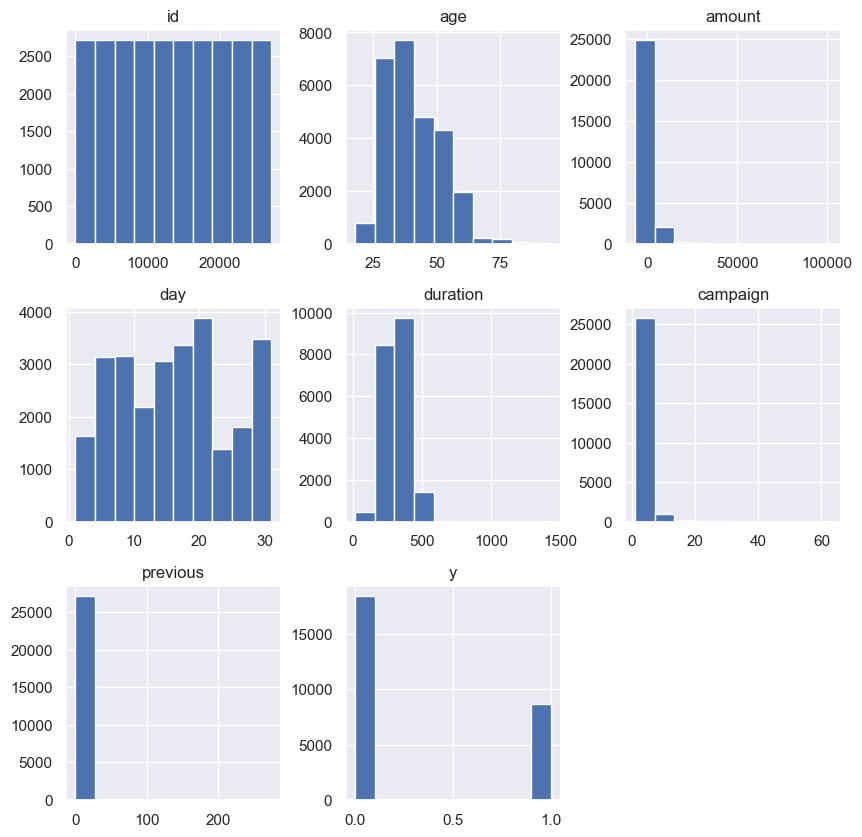

In [996]:
df.hist(figsize=(10, 10))

 ### データの外れ値確認

<Axes: >

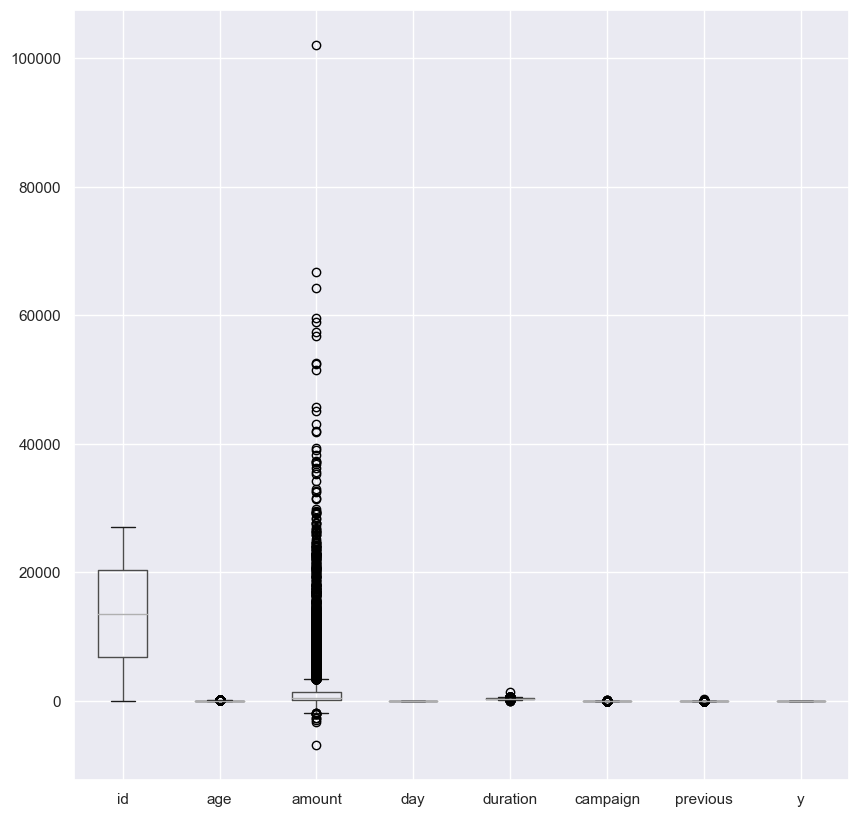

In [997]:
df.boxplot(figsize=(10, 10))

 ### データの可視化

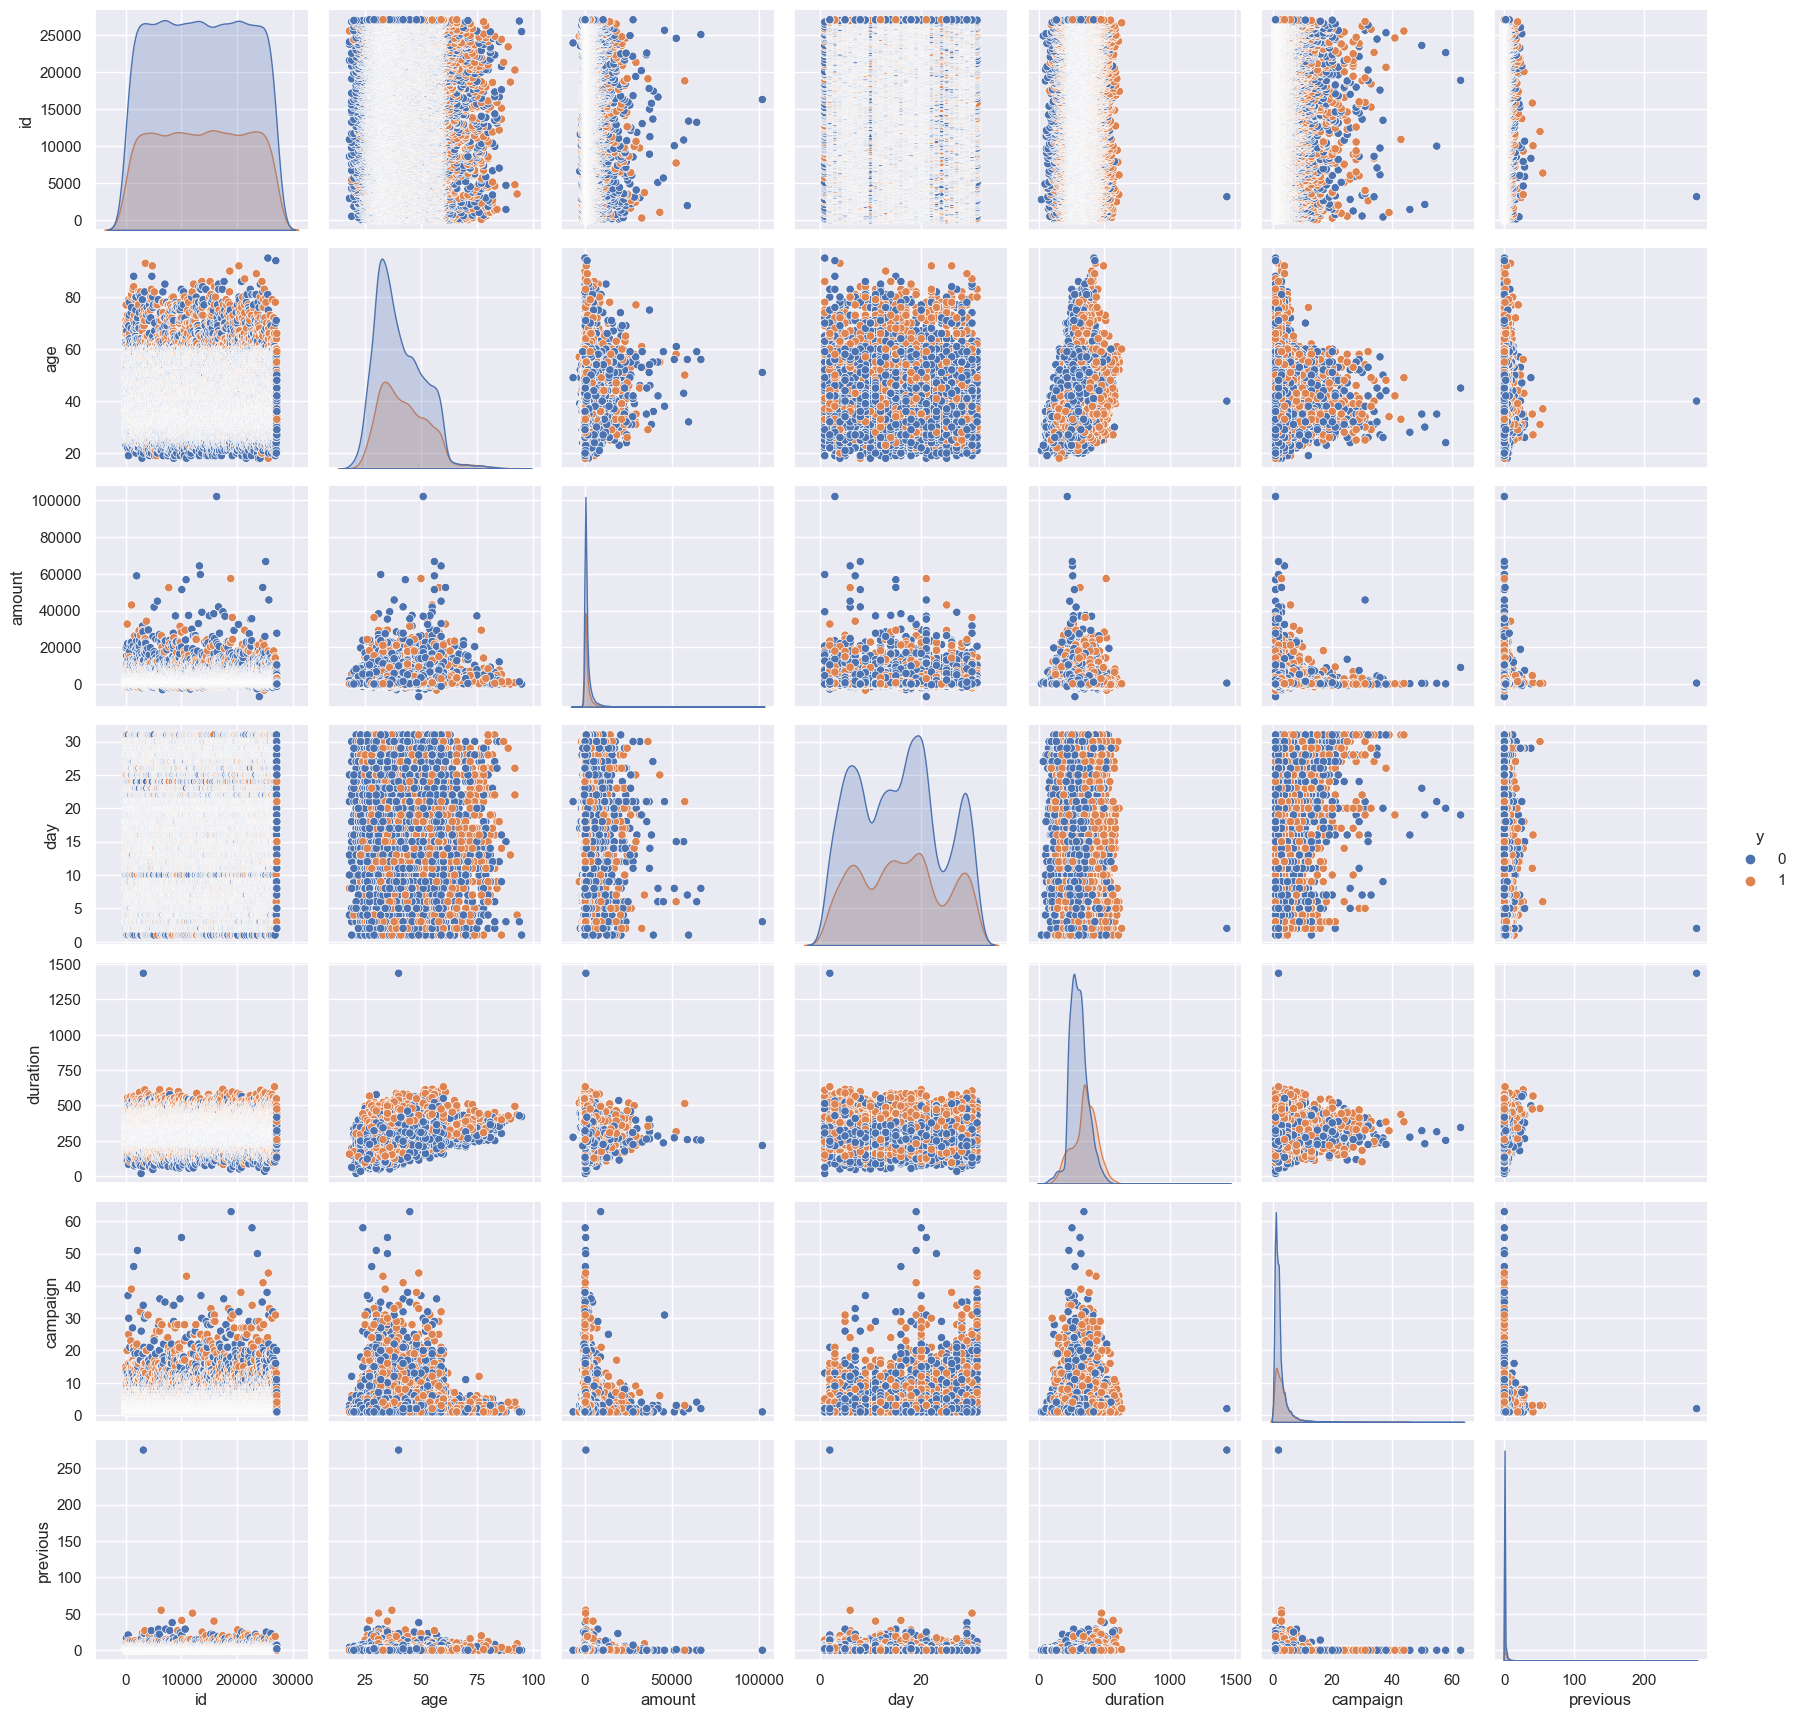

In [998]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.pairplot(df, hue='y')

 ### データの特徴量確認

In [999]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'amount',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'previous', 'y'],
      dtype='object')

 ### データの数値変数確認

In [1000]:
df.select_dtypes(include='number').columns

Index(['id', 'age', 'amount', 'day', 'duration', 'campaign', 'previous', 'y'], dtype='object')

 ### データのカテゴリカル変数確認

In [1001]:
df.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month'],
      dtype='object')

 ### 職種カテゴリ確認

In [1002]:
df['job'].value_counts()

blue-collar      5886
management       5620
technician       4491
admin.           3085
services         2506
retired          1391
self-employed     945
entrepreneur      914
unemployed        790
housemaid         765
student           557
unknown           178
Name: job, dtype: int64

<Axes: >

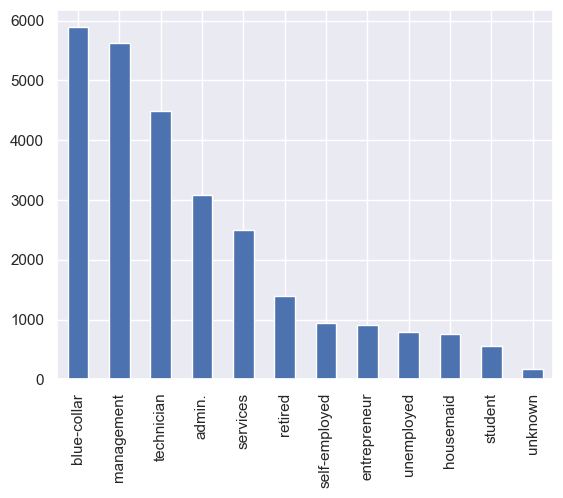

In [1003]:
df['job'].value_counts().plot(kind='bar')

 #### カテゴリーデータを数値に変換

<Axes: >

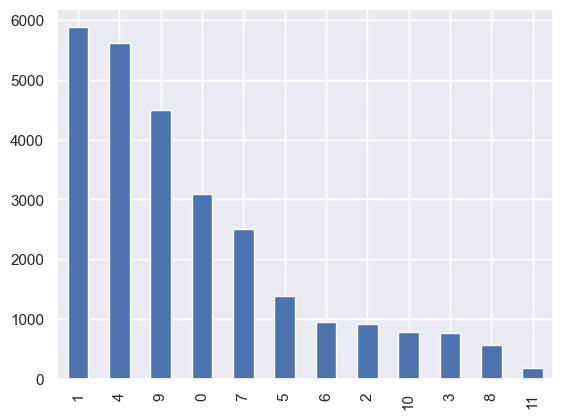

In [1004]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['job'] = encoder.fit_transform(df['job'])
df['job'].value_counts()
df['job'].value_counts().plot(kind='bar')

 #### ピボットテーブルによる集計

In [1005]:
df.pivot_table(index='y', columns='job', values='id', aggfunc='count')

job    0     1    2    3     4    5    6     7    8     9    10   11
y                                                                   
0    2138  3796  567  549  3900  881  659  1676  468  3094  591  126
1     947  2090  347  216  1720  510  286   830   89  1397  199   52

 ### 最終学歴カテゴリ確認

In [1006]:
df['education'].value_counts()

secondary    13882
tertiary      7959
primary       4150
unknown       1137
Name: education, dtype: int64

<Axes: >

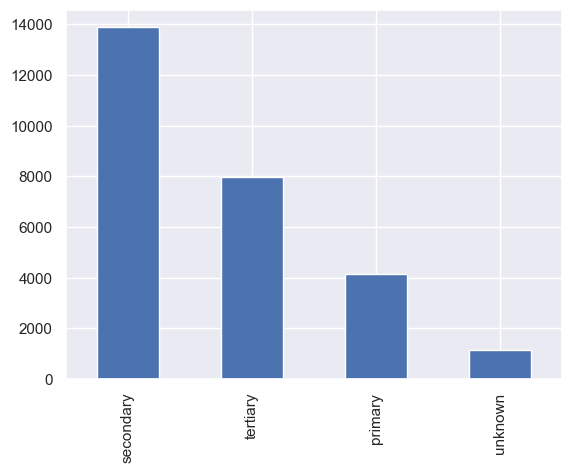

In [1007]:
df['education'].value_counts().plot(kind='bar')

 #### カテゴリーデータを数値に変換

<Axes: >

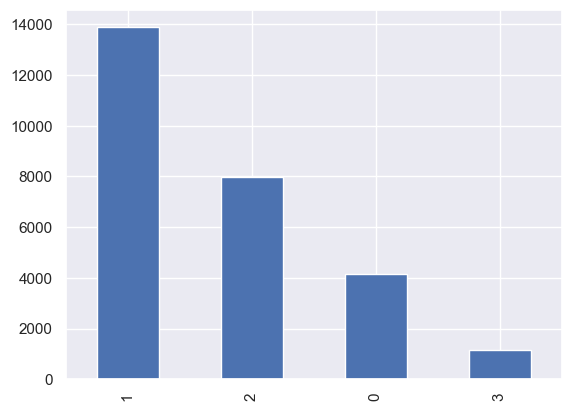

In [1008]:
encoder = LabelEncoder()
df['education'] = encoder.fit_transform(df['education'])
df['education'].value_counts()
df['education'].value_counts().plot(kind='bar')

 #### ピボットテーブルによる集計

In [1009]:
df.pivot_table(index='y', columns='education', values='id', aggfunc='count')

education     0     1     2    3
y                               
0          2691  9445  5574  735
1          1459  4437  2385  402

 ### 既婚／未婚／離別カテゴリ確認

In [1010]:
df['marital'].value_counts()

married     16411
single       7662
divorced     3055
Name: marital, dtype: int64

<Axes: >

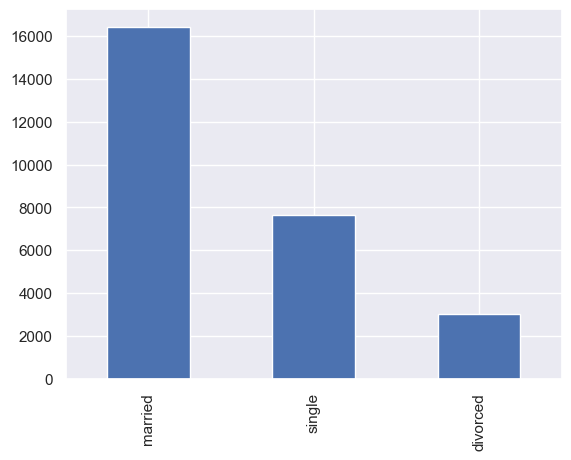

In [1011]:
df['marital'].value_counts().plot(kind='bar')

 #### カテゴリーデータを数値に変換

<Axes: >

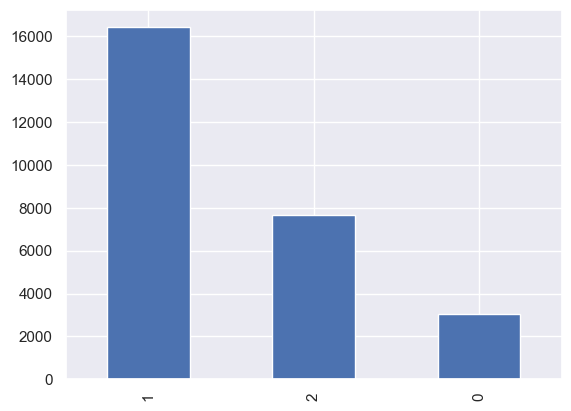

In [1012]:
encoder = LabelEncoder()
df['marital'] = encoder.fit_transform(df['marital'])
df['marital'].value_counts()
df['marital'].value_counts().plot(kind='bar')

 #### ピボットテーブルによる集計

In [1013]:
df.pivot_table(index='y', columns='marital', values='id', aggfunc='count')

marital     0      1     2
y                         
0        2033  10807  5605
1        1022   5604  2057

 ### 個人ローンの有無カテゴリ確認

In [1014]:
df['loan'].value_counts()

no     22788
yes     4340
Name: loan, dtype: int64

<Axes: >

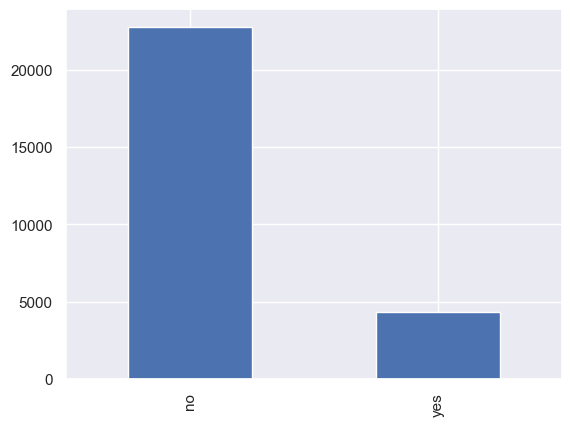

In [1015]:
df['loan'].value_counts().plot(kind='bar')

 #### カテゴリーデータを数値に変換

<Axes: >

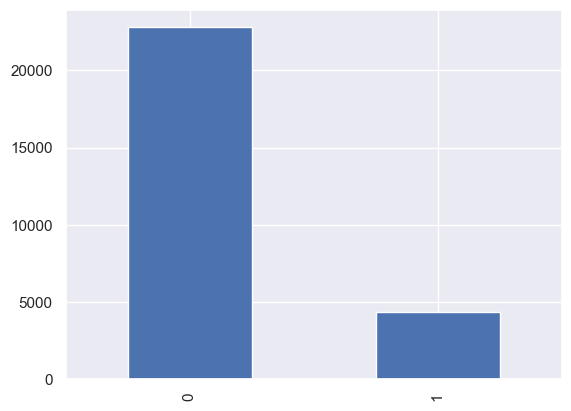

In [1016]:
encoder = LabelEncoder()
df['loan'] = encoder.fit_transform(df['loan'])
df['loan'].value_counts()
df['loan'].value_counts().plot(kind='bar')

 #### ピボットテーブルによる集計

In [1017]:
df.pivot_table(index='y', columns='loan', values='id', aggfunc='count')

loan      0     1
y                
0     15925  2520
1      6863  1820

 ### 住宅ローンの有無カテゴリ確認

In [1018]:
df['housing'].value_counts()

yes    15125
no     12003
Name: housing, dtype: int64

<Axes: >

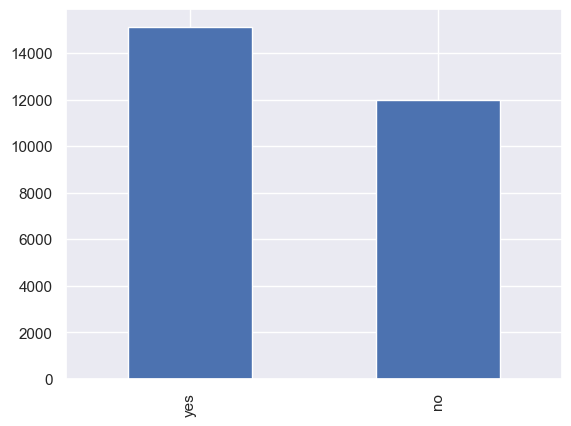

In [1019]:
df['housing'].value_counts().plot(kind='bar')

 #### カテゴリーデータを数値に変換

In [1020]:
encoder = LabelEncoder()
df['housing'] = encoder.fit_transform(df['housing'])
df['housing'].value_counts()

1    15125
0    12003
Name: housing, dtype: int64

 #### ピボットテーブルによる集計

In [1021]:
df.pivot_table(index='y', columns='housing', values='id', aggfunc='count')

housing     0     1
y                  
0        9396  9049
1        2607  6076

 ### 債務不履行の有無カテゴリ確認

In [1022]:
df['default'].value_counts()

no     26644
yes      484
Name: default, dtype: int64

<Axes: >

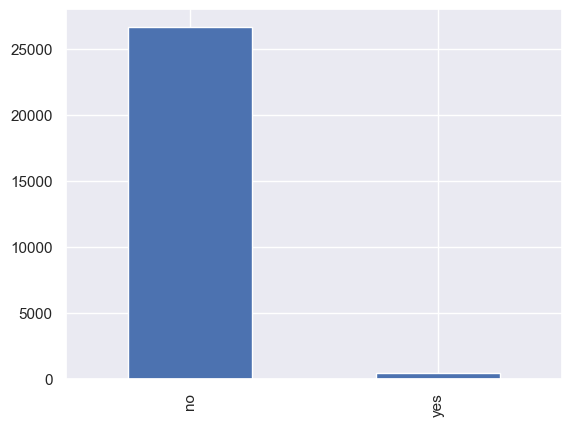

In [1023]:
df['default'].value_counts().plot(kind='bar')

 #### カテゴリーデータを数値に変換

<Axes: >

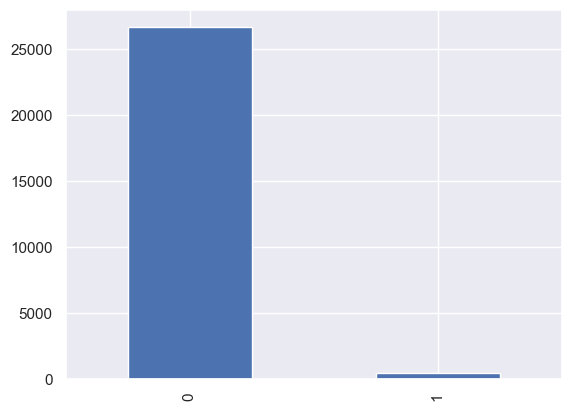

In [1024]:
encoder = LabelEncoder()
df['default'] = encoder.fit_transform(df['default'])
df['default'].value_counts().plot(kind='bar')

 #### ピボットテーブルによる集計

In [1025]:
df.pivot_table(index='y', columns='default', values='id', aggfunc='count')

default      0    1
y                  
0        18081  364
1         8563  120

 ### 最終接触月確認

In [1026]:
df['month'].value_counts()

may    8317
jul    4136
aug    3718
jun    3204
nov    2342
apr    1755
feb    1586
jan     846
oct     439
sep     356
mar     299
dec     130
Name: month, dtype: int64

<Axes: >

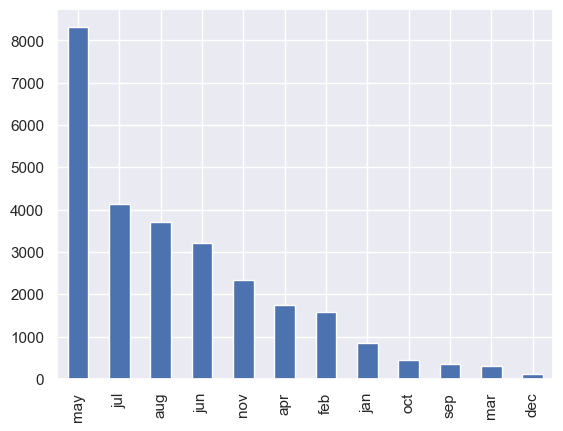

In [1027]:
df['month'].value_counts().plot(kind='bar')

 #### カテゴリーデータを数値に変換

<Axes: >

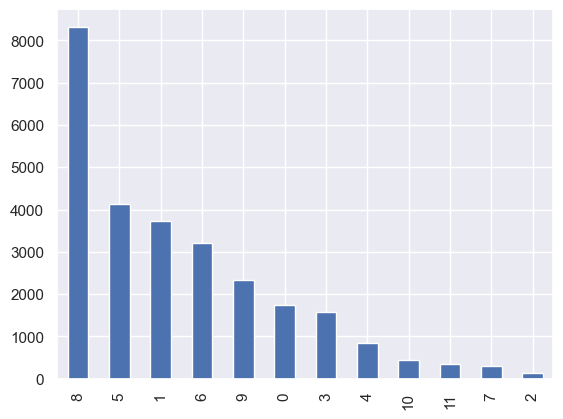

In [1028]:
encoder = LabelEncoder()
df['month'] = encoder.fit_transform(df['month'])
df['month'].value_counts().plot(kind='bar')

 #### ピボットテーブルによる集計

In [1029]:
df.pivot_table(index='y', columns='month', values='id', aggfunc='count')

month    0     1   2     3    4     5     6    7     8     9    10   11
y                                                                      
0      1204  2788  86  1165  669  2869  2046  194  5079  1791  309  245
1       551   930  44   421  177  1267  1158  105  3238   551  130  111

 ### 連絡方法カテゴリ確認

In [1030]:
df['contact'].value_counts()

cellular             17580
sending _document     7861
telephone             1687
Name: contact, dtype: int64

<Axes: >

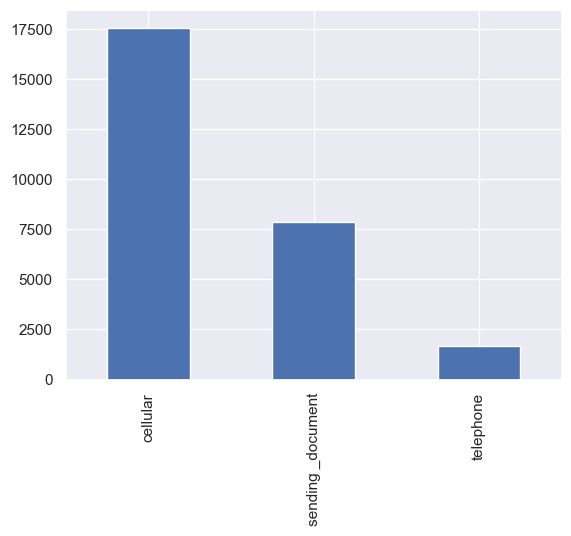

In [1031]:
df['contact'].value_counts().plot(kind='bar')

 #### カテゴリーデータを数値に変換

<Axes: >

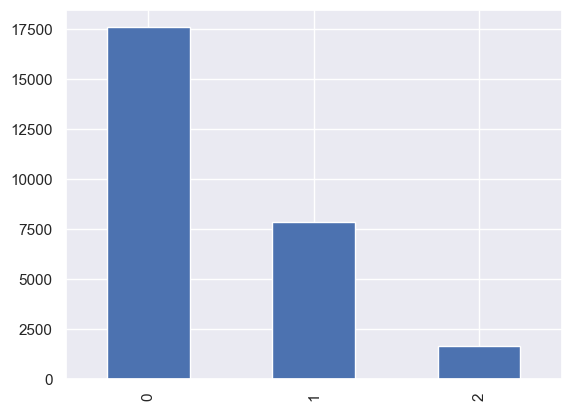

In [1032]:
encoder = LabelEncoder()
df['contact'] = encoder.fit_transform(df['contact'])
df['contact'].value_counts().plot(kind='bar')

 #### ピボットテーブルによる集計

In [1033]:
df.pivot_table(index='y', columns='contact', values='id', aggfunc='count')

contact      0     1     2
y                         
0        12712  4577  1156
1         4868  3284   531

 ### データの目的変数確認

In [1034]:
df['y'].value_counts()

0    18445
1     8683
Name: y, dtype: int64

<Axes: >

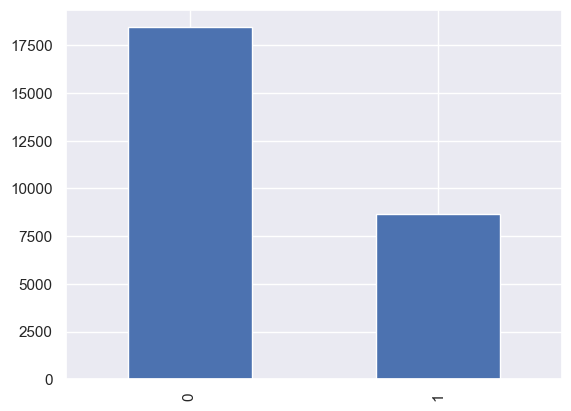

In [1035]:
df['y'].value_counts().plot(kind='bar')

 ### データの分布確認

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'job'}>,
        <Axes: title={'center': 'marital'}>],
       [<Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'default'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'housing'}>],
       [<Axes: title={'center': 'loan'}>,
        <Axes: title={'center': 'contact'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'y'}>]], dtype=object)

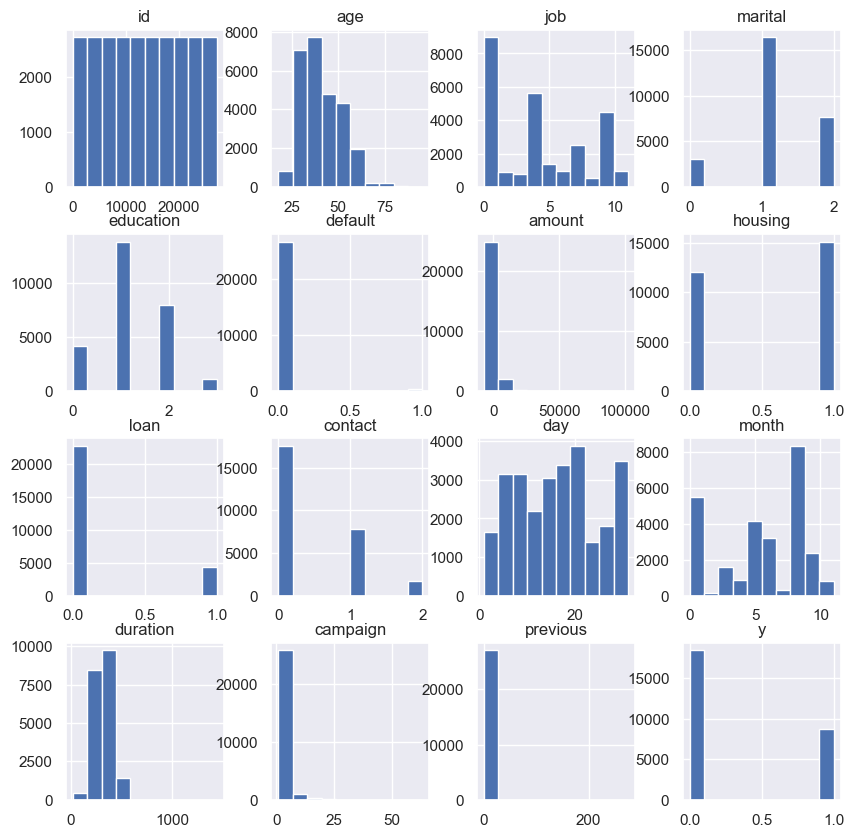

In [1036]:
df.hist(figsize=(10, 10))

 ### データの外れ値確認

<Axes: >

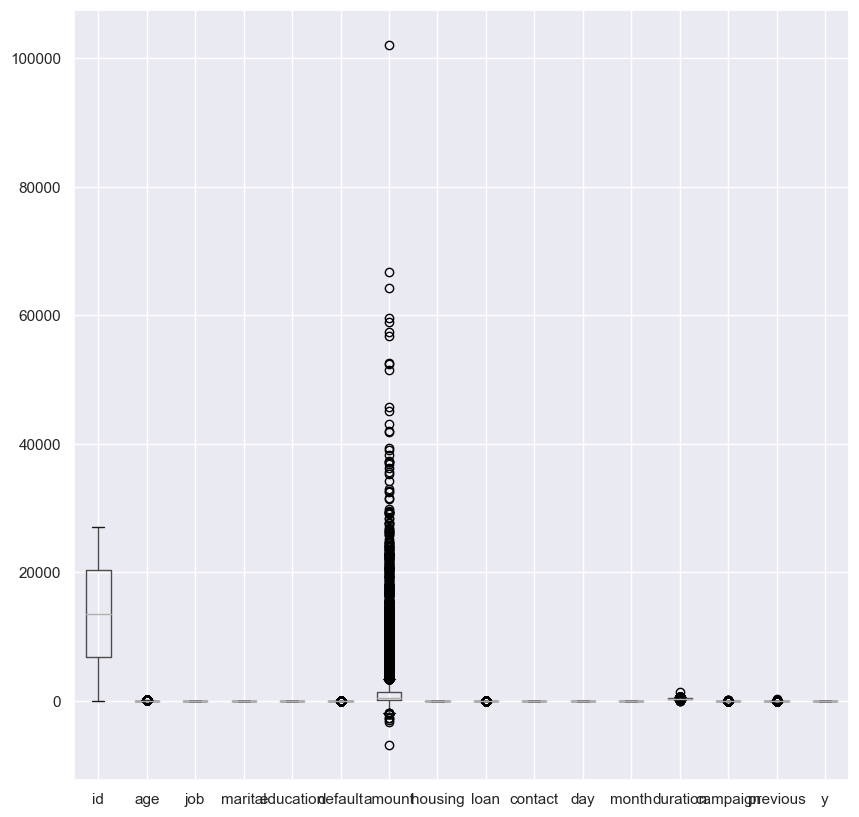

In [1037]:
df.boxplot(figsize=(10, 10))

 ### データの可視化

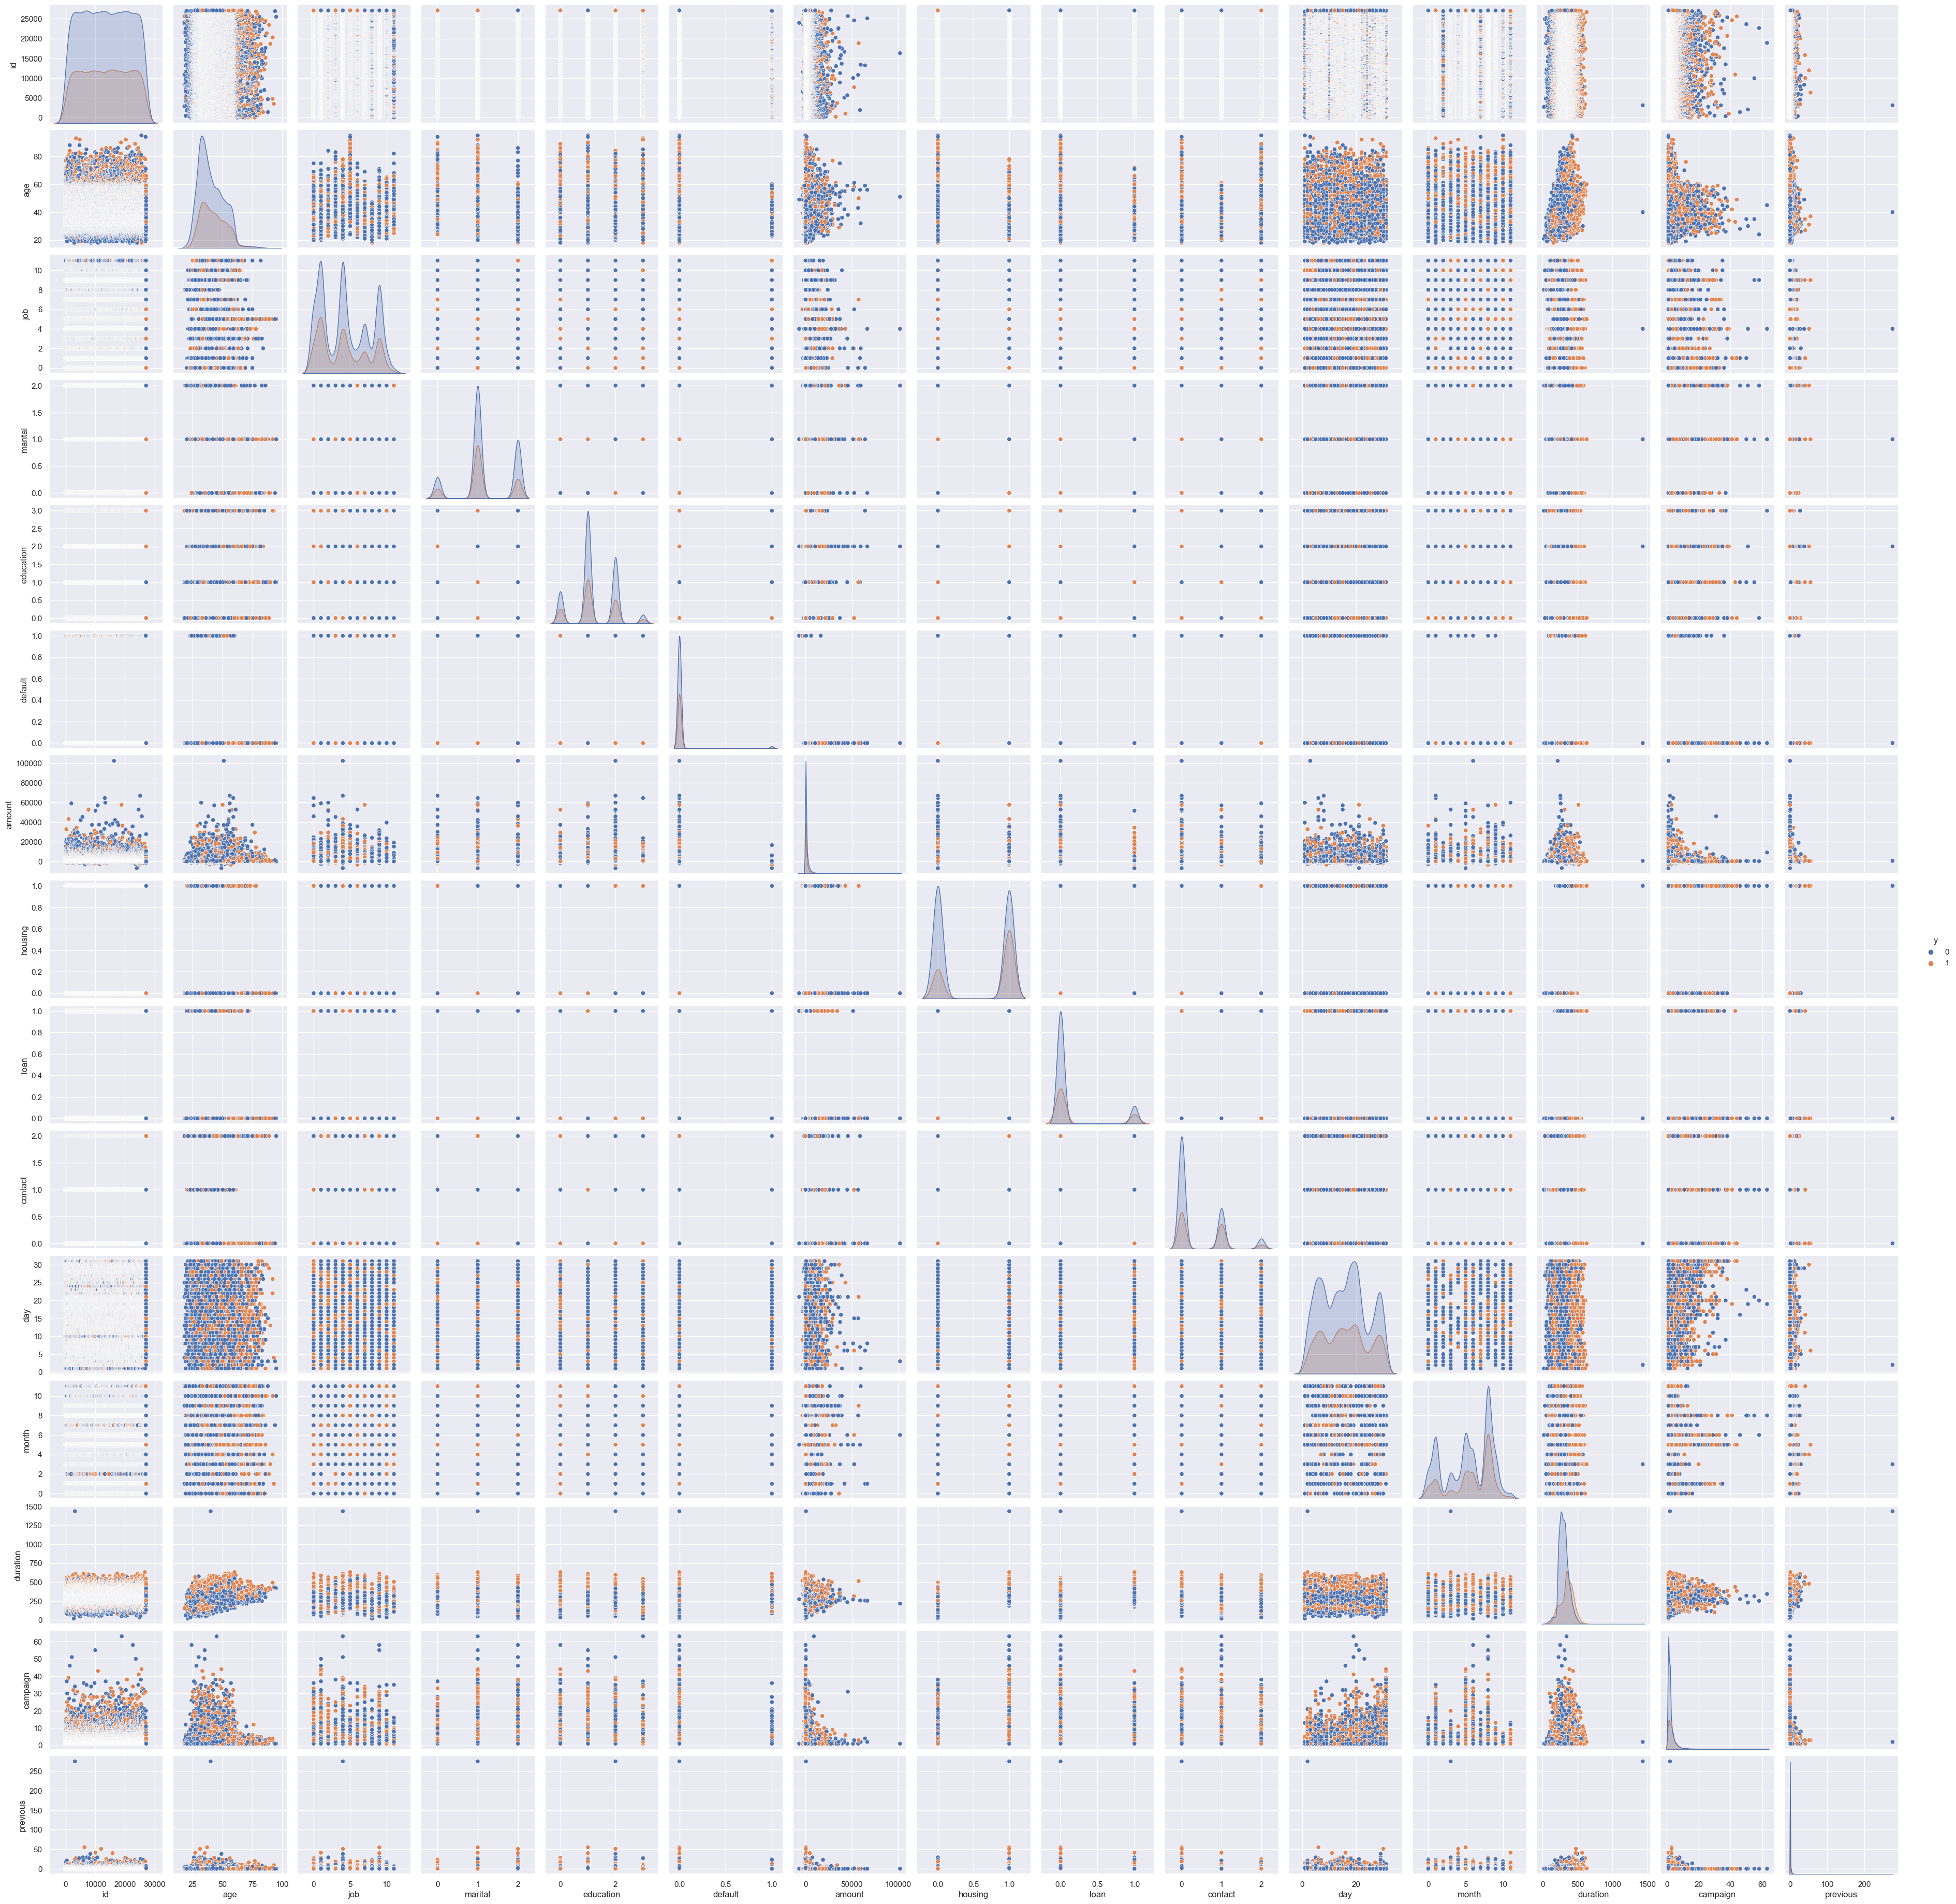

In [1038]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.pairplot(df, hue='y')

 ### データの欠損確認

In [1039]:
df.isnull().any()

id           False
age          False
job          False
marital      False
education    False
default      False
amount       False
housing      False
loan         False
contact      False
day          False
month        False
duration      True
campaign     False
previous     False
y            False
dtype: bool

In [1040]:
df.isnull().sum()

id              0
age             0
job             0
marital         0
education       0
default         0
amount          0
housing         0
loan            0
contact         0
day             0
month           0
duration     7044
campaign        0
previous        0
y               0
dtype: int64

 ### データの重複確認

In [1041]:
df.duplicated().sum()

0

 ## 分析の実施

 ## データの前処理

 ### CSVファイルの読み込み

In [1042]:
import pandas as pd
df = pd.read_csv(path + '/data/bank.csv', sep=',')
df.head()

id  age           job  marital  education default  amount housing loan  \
0   1   39   blue-collar  married  secondary      no  1756.0     yes   no   
1   2   51  entrepreneur  married    primary      no  1443.0      no   no   
2   3   36    management   single   tertiary      no   436.0      no   no   
3   4   63       retired  married  secondary      no   474.0      no   no   
4   5   31    management   single   tertiary      no   354.0      no   no   

    contact  day month    duration  campaign  previous  y  
0  cellular    3   apr  370.055237         1         0  1  
1  cellular   18   feb  233.998933        10         0  1  
2  cellular   13   apr         NaN         1         2  0  
3  cellular   25   jan  252.525808         1         0  0  
4  cellular   30   apr         NaN         1         2  0

 ### 欠損地処理（行削除・全体代表値埋め、グループ代表値埋め）

 ### 欠損値を含む行を削除

In [1043]:
df.dropna(inplace=True)

 ### 各手法を必要に応じて実施

 - 外れ値の除外
 - 多項式特徴量・交互作用特徴量の追加
 - 特徴量の絞り込み
 - 標準化

 ### 特徴量xと正解tに分割

In [1044]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import LabelEncoder

# カテゴリカル変数を指定してLabelEncoderを作成
encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# データの分割とスケーリング
X = df.drop('y', axis=1)
y = df['y']

 ### 教師データの分割

In [1045]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

 ## モデルの作成と学習

 ### 未学習状態モデルの生成（分類なら決定木、回帰なら線形回帰）

In [1046]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=1234)

 ### 訓練データで学習（必要に応じて不均衡データ補正）

In [1047]:
model.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

 ## モデルの評価

In [1048]:
model.score(X_test_std, y_test)

0.7413492656211103

In [1049]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_std)
accuracy_score(y_test, y_pred)

0.7413492656211103

 ### 検証データで評価し指標確認（分類なら正解率、回帰なら決定係数）

 ### 決定木における特徴量の考察

In [1050]:
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train_std.shape[1]):
    print(f'{f+1}番目に重要な特徴量：{X.columns[indices[f]]} {importances[indices[f]]}')

1番目に重要な特徴量：duration 0.5536942550428421
2番目に重要な特徴量：campaign 0.34558841405978835
3番目に重要な特徴量：housing 0.09063240664026831
4番目に重要な特徴量：loan 0.0100849242571012
5番目に重要な特徴量：previous 0.0
6番目に重要な特徴量：month 0.0
7番目に重要な特徴量：day 0.0
8番目に重要な特徴量：contact 0.0
9番目に重要な特徴量：amount 0.0
10番目に重要な特徴量：default 0.0
11番目に重要な特徴量：education 0.0
12番目に重要な特徴量：marital 0.0
13番目に重要な特徴量：job 0.0
14番目に重要な特徴量：age 0.0
15番目に重要な特徴量：id 0.0


 ### NG:改善案検討前処理に戻る
 ### OK:最終性能評価（テストデータで評価）

In [1051]:
doctest.testmod(verbose=True)
unittest.main(argv=[''], verbosity=2, exit=False)

3 items had no tests:
    __main__
    __main__.__VSCODE_compute_hash
    __main__.__VSCODE_wrap_run_cell
0 tests in 3 items.
0 passed and 0 failed.
Test passed.



----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK
